## 乳腺癌预测调参

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV\
                                    ,validation_curve
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
cancer=load_breast_cancer()
x=cancer['data']
y=cancer['target']

### step1：使用初始模型（所有参数都为默认值）得到交叉验证结果

In [3]:
rfc=RandomForestClassifier(n_estimators=100,random_state=90)
score_pre=cross_val_score(rfc,x,y,cv=10).mean()
score_pre

0.9648809523809524

### step2：先调节n_estimators，使用验证曲线

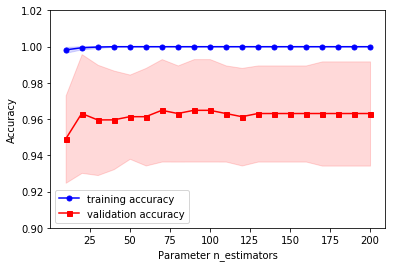

70
0.9648809523809524


In [4]:
param_range=np.arange(10,200+1,10)
rfc=RandomForestClassifier(random_state=90)
train_scores,test_scores=validation_curve(estimator=rfc,X=x,y=y,param_name='n_estimators',
                                          param_range=param_range,cv=10)
train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
test_scores_std=np.std(test_scores,axis=1)

plt.figure()
plt.plot(param_range,train_scores_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range,train_scores_mean+train_scores_std,train_scores_mean-train_scores_std,alpha=0.15,color='blue')
plt.plot(param_range,test_scores_mean,color='red',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_scores_mean+test_scores_std,test_scores_mean-test_scores_std,alpha=0.15,color='red')
plt.xlabel("Parameter n_estimators")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.ylim([0.9,1.02])
plt.show()

print(param_range[np.argmax(test_scores_mean)])
print(np.max(test_scores_mean))

1.首先观察打印结果，可以发现最优分数没有变化，故仍可以采用n_estimators=100。  
2.其次观察验证曲线，训练分数都是1左右，但是验证分数却在0.96左右，初步猜测是过拟合，可以向降低复杂度方向调参。

### step3：再调max_depth，该参数在降低模型复杂度上有显著效果。

In [5]:
param_range=np.arange(1,30+1,1)
rfc=RandomForestClassifier(n_estimators=100,random_state=90)
gs=GridSearchCV(rfc,param_grid={'max_depth':param_range},cv=10)
gs.fit(x,y)

print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 8}
0.9666666666666666


发现模型分数有些许提升，并且最大深度降到8，也验证了模型过拟合的初始状态。

### step4：因此时无法确定模型状态，故可调max_features，该参数可降低或者升高复杂度。

In [8]:
# 初始
param_range=np.arange(5,30,1)
rfc=RandomForestClassifier(n_estimators=100,max_features=8,random_state=90)
gs=GridSearchCV(rfc,param_grid={'max_features':param_range},cv=10)
gs.fit(x,y)

print(gs.best_params_)
print(gs.best_score_)

{'max_features': 24}
0.9666666666666668


模型分数没有变化，故也不需再调节了。
